# Model Tuning 

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [3]:
df = pd.read_csv('./data/processed_data.csv')

In [4]:
base_score = 1 - df['renewed'].mean()
base_score

0.6456140350877193

In [5]:
df.head()

,title,genre,renewed,table,year,premiere_year,seasons_count,episodes_count,length_low,length_hi,...,premiere_month_3.0,premiere_month_4.0,premiere_month_5.0,premiere_month_6.0,premiere_month_7.0,premiere_month_8.0,premiere_month_9.0,premiere_month_10.0,premiere_month_11.0,premiere_month_12.0
0,House of Cards,political drama,0,0,2013,2013,6,73.0,42,59,...,0,0,0,0,0,0,0,0,0,0
1,Hemlock Grove,horror thriller,0,0,2013,2013,3,33.0,45,58,...,0,1,0,0,0,0,0,0,0,0
2,Orange Is the New Black,comedy drama,0,0,2013,2013,7,91.0,50,92,...,0,0,0,0,1,0,0,0,0,0
3,Marco Polo,historical drama,0,0,2014,2014,2,20.0,48,65,...,0,0,0,0,0,0,0,0,0,1
4,Bloodline,thriller,0,0,2015,2015,3,33.0,48,68,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df.isnull().mean().sort_values()

title                  0.0
show                   0.0
life                   0.0
legal                  0.0
aftershow              0.0
                      ... 
western                0.0
educational            0.0
animation              0.0
motoring               0.0
premiere_month_12.0    0.0
Length: 108, dtype: float64

In [7]:
X = df.select_dtypes(include='number').drop(columns=['renewed','year','table'])
y = df['renewed']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# First Logistic Regression 

In [8]:
logreg = LogisticRegression()

In [9]:
logreg.fit(X_train, y_train)

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
cross_val_score(logreg, X_train, y_train).mean()

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6008197332140995

In [11]:
logreg.score(X_train, y_train)

0.7652582159624414

In [12]:
logreg.score(X_test, y_test)

0.5694444444444444

In [13]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly_tr = poly.fit_transform(X_train)
X_poly_te = poly.transform(X_test)

In [14]:
logreg.fit(X_poly_tr, y_train)

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
cross_val_score(logreg, X_poly_tr, y_train).mean()

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5164319248826291

In [16]:
logreg.score(X_poly_tr, y_train)

0.8497652582159625

In [17]:
logreg.score(X_poly_te, y_test)

0.5972222222222222

In [18]:
base_score

0.6456140350877193

# Naive Bayes 

In [19]:
ss = StandardScaler()

In [20]:
X_train_sc = ss.fit_transform(X_train)

In [21]:
X_test_sc = ss.transform(X_test)

In [22]:
gauss = GaussianNB()

In [23]:
gauss.fit(X_train_sc, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
def evaluate_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
   
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Testing score: {model.score(X_test, y_test)}")
    return model

In [25]:
evaluate_model(gauss)

Training score: 0.5117370892018779
Testing score: 0.4722222222222222


GaussianNB(priors=None, var_smoothing=1e-09)

# Decision Tree Classifier 

In [26]:
tree = DecisionTreeClassifier()

In [27]:
evaluate_model(tree)

Training score: 1.0
Testing score: 0.6805555555555556


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
grid = GridSearchCV(DecisionTreeClassifier(),
                    {'max_depth':[None,3,4,10],
                     'min_samples_split':[2,5,10],
                     'min_samples_leaf':[2, 5, 9],
                     'random_state':[42]
                     },cv=5
)

In [29]:
model = evaluate_model(grid)
model.best_params_

Training score: 0.8028169014084507
Testing score: 0.7777777777777778


/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'random_state': 42}

# Multinomial Naive Bayes 

In [30]:
grid = GridSearchCV(MultinomialNB(),
                    {'alpha':np.logspace(-2,3,40)
                     },cv=5
)

In [31]:
model = evaluate_model(grid)
model.best_params_

Training score: 0.6572769953051644
Testing score: 0.6111111111111112


/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 16.037187437513293}

# Random  Forest Classifier 

In [34]:
grid = GridSearchCV(RandomForestClassifier(),
                    {'max_depth':[None,3,4,10],
                     'min_samples_split':[2,5,10],
                     'min_samples_leaf':[2, 5, 9],
                     'random_state':[42]
                     },cv=5
)

In [35]:
model = evaluate_model(grid)
model.best_params_

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3

Training score: 0.8873239436619719
Testing score: 0.6527777777777778


/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/graphviz/lib/python3

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

# Logistic Regression 

In [36]:
grid = GridSearchCV(LogisticRegression(),
                    {'C':np.logspace(-2,3,30),
                     'random_state':[42],
                    },cv=5
)

In [37]:
model = evaluate_model(grid)
model.best_params_

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Training score: 0.6431924882629108
Testing score: 0.5972222222222222


/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

{'C': 0.01, 'random_state': 42}

In [38]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [39]:
rtree = RandomForestClassifier()

In [40]:
evaluate_model(rtree)

Training score: 0.9765258215962441
Testing score: 0.7361111111111112


/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Ensemble Voting 

In [41]:
voter = VotingClassifier([
    ('tree',DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=2,random_state=42)),
    ('gauss',MultinomialNB(alpha=16.037187437513293)),
    ('rtree',RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,random_state=42))
])

In [42]:
evaluate_model(voter)

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score: 0.7887323943661971
Testing score: 0.7083333333333334


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=42,
                                                     splitter='best')),
         

In [43]:
cross_val_score(logreg, X_poly_tr, y_train).mean()

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5164319248826291

# Polynomial Features 

In [44]:
poly = PolynomialFeatures(degree=3)

In [45]:
X_poly_tr = poly.fit_transform(X_train)
X_poly_te = poly.transform(X_test)

In [46]:
voter = VotingClassifier([
    ('tree',DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=2,random_state=42)),
    ('gauss',MultinomialNB(alpha=16.037187437513293)),
    ('rtree',RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,random_state=42))
])

In [47]:
evaluate_model(voter,X_train=X_poly_tr, X_test=X_poly_te)

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score: 0.8450704225352113
Testing score: 0.6944444444444444


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=42,
                                                     splitter='best')),
         

In [48]:
evaluate_model(tree,X_poly_tr, X_poly_te)

Training score: 1.0
Testing score: 0.6805555555555556


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# LassoCV Regression 

In [49]:
from sklearn.linear_model import LassoCV

In [50]:
lasso = LassoCV()

In [56]:
model = evaluate_model(lasso, X_poly_tr, X_poly_te)

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005474209124523455, tolerance: 0.0033697183098591555
  positive)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [52]:
poly2 = PolynomialFeatures(degree=2,include_bias=False)

In [53]:
corr_df = pd.DataFrame(poly2.fit_transform(X),columns=poly2.get_feature_names(X.columns))
corr_df['renewed'] = y
corr_df

,premiere_year,seasons_count,episodes_count,length_low,length_hi,post,anthology,of,sketch,fantasy,...,premiere_month_9.0 premiere_month_10.0,premiere_month_9.0 premiere_month_11.0,premiere_month_9.0 premiere_month_12.0,premiere_month_10.0^2,premiere_month_10.0 premiere_month_11.0,premiere_month_10.0 premiere_month_12.0,premiere_month_11.0^2,premiere_month_11.0 premiere_month_12.0,premiere_month_12.0^2,renewed
0,2013.0,6.0,73.0,42.0,59.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2013.0,3.0,33.0,45.0,58.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2013.0,7.0,91.0,50.0,92.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2014.0,2.0,20.0,48.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,2015.0,3.0,33.0,48.0,68.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2018.0,1.0,10.0,43.0,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
281,2019.0,1.0,10.0,48.0,55.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
282,2019.0,1.0,10.0,47.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
283,2019.0,1.0,8.0,41.0,57.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


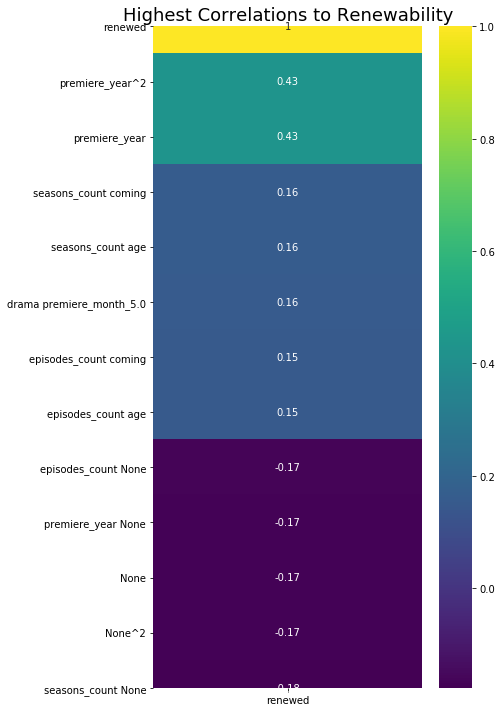

In [54]:
plt.figure(figsize=(7,10))
corr = corr_df.corr()[['renewed']].sort_values(by='renewed',ascending=False)
corr = corr[np.abs(corr['renewed']) >= 0.15]
sns.heatmap(corr,cmap='viridis', annot=True)
plt.title("Highest Correlations to Renewability", size = 18)
plt.tight_layout()
plt.savefig('./images/correlation.png')

/anaconda3/envs/graphviz/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


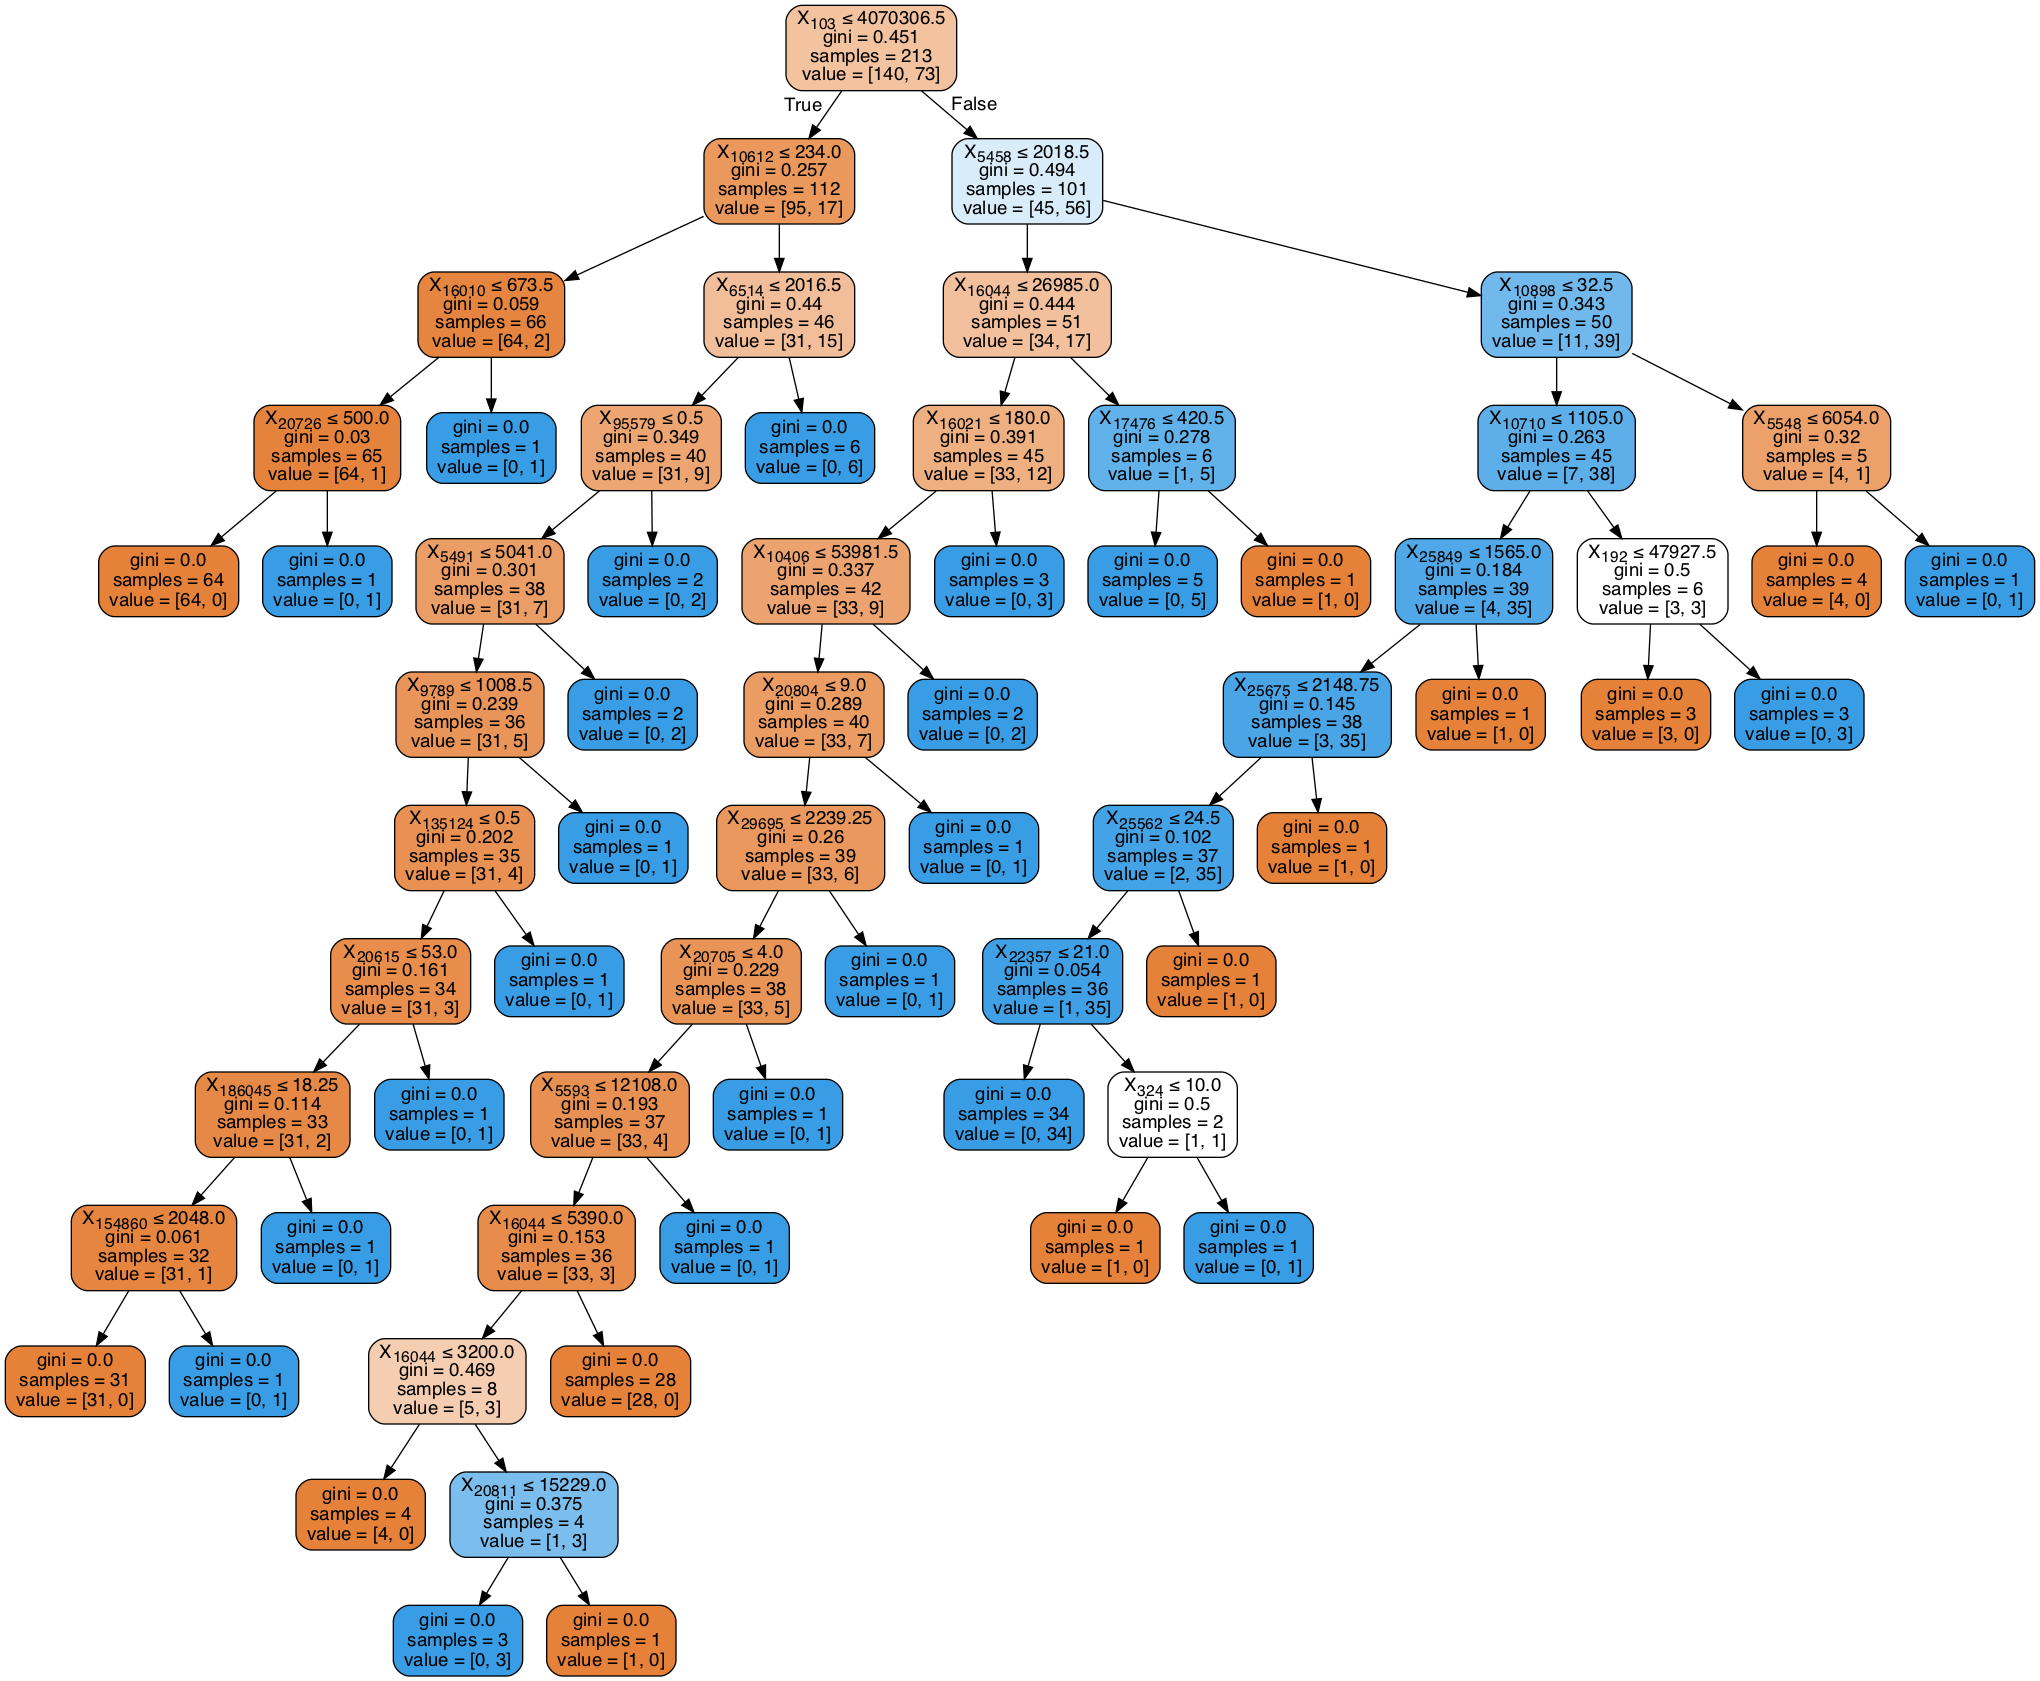

In [55]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())